<a href="https://colab.research.google.com/github/gitorivera/HuggingFace_models_in_Colab/blob/main/HuggingFace_Falcon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

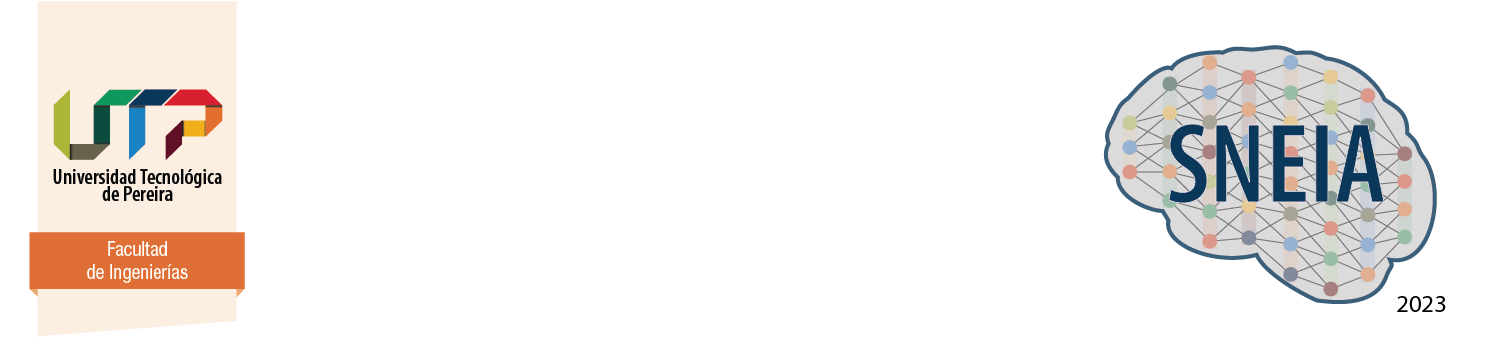

# Uso de FALCON con LangChain
Intalación de las librerias necesarias

In [1]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.8 MB/s eta 0:00:00


In [2]:
!nvidia-smi

Thu Oct 19 18:00:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Vamos a importar as librerias necesarias e implementaremos los pipelines

In [3]:
from langchain import HuggingFacePipeline
from transformers import AutoTokenizer, pipeline
import torch

model = "tiiuae/falcon-7b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model)

pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code = True,
    device_map = "auto",
    max_length = 200,
    do_sample = True,
    top_k = 10,
    num_return_sequences = 1,
    eos_token_id = tokenizer.eos_token_id
)

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
llm = HuggingFacePipeline(pipeline = pipeline, model_kwargs = {'temperature':0})

Ingresamos el texto que queremos trabajar

In [10]:
from langchain import PromptTemplate,  LLMChain

template = """
Eres un experto programador.
Question: {question}
Answer:"""
prompt = PromptTemplate(template=template, input_variables=["question"])

llm_chain = LLMChain(prompt=prompt, llm=llm)

question = "dame un codigo de python para generar un vector de 100 puntos con distribución normal "

print(llm_chain.run(question))

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.




import numpy as np
import matplotlib.pyplot as plt

# Generación de puntos
def generar_vector(n):
    x = np.linspace(0,100,100)
    y = np.sin(x)
    z = np.zeros(100)
    for i in range(n):
        z[i] = y[i]
    return z

plt.plot(generar_vector(100))
plt.xlabel('x')
plt.ylabel('y')
plt.show()
